In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('train-Copy1.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test= pd.read_csv('test-Copy1.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Basic required EDA

In [5]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Non-useful columns and missing Values handling

#### Here we can see that (name, Cabin and ticket)columns can't help in analysis of survival, so we will drop them

In [8]:
to_drop= ['Name', 'Ticket', 'Cabin']
df.drop( to_drop, axis= 1, inplace= True)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

#### Now Age has 177 null values which is obviously a high number and can;t be ignored. Hence we will replace this with median of all Ages in dataset. 
#### Also 2 null values of Embarked can be ignored and dropped easily

In [10]:
df['Age']= df['Age'].fillna(df['Age'].median())
df['Age'].mode()

0    28.0
dtype: float64

In [11]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [12]:
df.drop([61, 829],axis= 0, inplace= True)
df.shape

(889, 9)

0    549
1    340
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

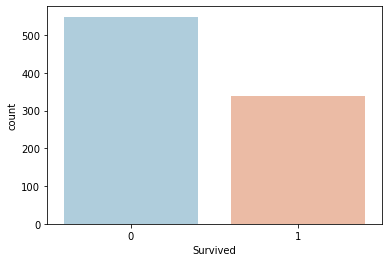

In [13]:
print(df['Survived'].value_counts())
sns.countplot( data=df, x = df['Survived'],palette='RdBu_r')

In [14]:
cols = df.columns.to_list()
num_cols= df._get_numeric_data().columns.to_list()
cat_cols = list(set(cols) - set(num_cols))
print('Numerical Columns')
print(num_cols)
print('\nCategorical Columns')
print(cat_cols)

Numerical Columns
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Categorical Columns
['Embarked', 'Sex']


## Converting categorical data to numerical

#### Since our model can;t analyse the text data or categorical variable, we should convert it to useful form using encoding. We will use the dummy data for same

In [15]:
# One-Hot Encoding

embark = pd.get_dummies(df['Embarked'],prefix='Embarked')
sex = pd.get_dummies(df['Sex'],prefix='Sex')
df_new= pd.concat([embark, sex],axis=1)
df_new.head()

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,0,1,0,1
1,1,0,0,1,0
2,0,0,1,1,0
3,0,0,1,1,0
4,0,0,1,0,1


In [16]:
df= pd.concat([df, df_new], axis=1)
df.drop(['Sex', 'Embarked'], axis=1, inplace= True)

## Working on Datatypes

In [17]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
Sex_female       uint8
Sex_male         uint8
dtype: object

In [18]:
df['Age'].astype('int')
df['Fare'].astype('int')

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 889, dtype: int32

### Now the dataset df is ready to use as a train data. Also we need to solve our test data. 

Processing the test data 

In [19]:
test = test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
embark = pd.get_dummies(test['Embarked'], prefix= 'Embarked')
sex= pd.get_dummies(test['Sex'], prefix= 'Sex')
test.drop(['Embarked','Sex'],axis=1,inplace=True)
test = pd.concat([test,sex,embark],axis=1)
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Age'] = test["Age"].fillna(test['Age'].median())
test['Age'].astype('int')
test['Fare'].astype('int')
TEST = test
test.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


## Train-test split

In [20]:
X= df.drop('Survived', axis=1)
y= df['Survived']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.33, random_state= 101)
y_test

511    0
613    0
615    1
337    1
718    0
      ..
618    1
681    1
779    1
627    1
425    0
Name: Survived, Length: 294, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
test = scaler.transform(test)

In [23]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [24]:
param = LR.get_params()
pd.DataFrame(data = param, index = [0])

,C,class_weight,dual,fit_intercept,intercept_scaling,l1_ratio,max_iter,multi_class,n_jobs,penalty,random_state,solver,tol,verbose,warm_start
0,1.0,None,False,True,1,None,100,auto,None,l2,None,lbfgs,0.0001,0,False


In [25]:
y_predicted= LR.predict(X_test)
y_predicted.size

294

### Clearly we can see we have got output of all 418 values in test data file

## Model Evaluation parameter



In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print('Accuracy =', accuracy_score(y_test, y_predicted))
print("Confusion_matrix=", confusion_matrix(y_test, y_predicted))

Accuracy = 0.8095238095238095
Confusion_matrix= [[157  17]
 [ 39  81]]


In [27]:
## Getting the output out of the data
y_pred= LR.predict(test)
print(test)

[[ 1.7545809   0.82781324  0.39650332 ... -1.62797627  1.34903863
  -1.34903863]
 [ 1.75850793  0.82781324  1.37854528 ... -1.62797627 -0.74126862
   0.74126862]
 [ 1.76243495 -0.36479906  2.55699563 ... -1.62797627  1.34903863
  -1.34903863]
 ...
 [ 3.38429566  0.82781324  0.71075675 ... -1.62797627 -0.74126862
   0.74126862]
 [ 3.38822268  0.82781324 -0.19272186 ... -1.62797627 -0.74126862
   0.74126862]
 [ 3.3921497   0.82781324 -0.19272186 ...  0.61425957 -0.74126862
  -1.34903863]]


In [28]:
my_sub = pd.DataFrame({'PassengerId': TEST.PassengerId, 'Survived': y_pred})
# simply use any filename and choose submission as pelow
my_sub.to_csv('sub_titanic.csv', index= True)

In [29]:
df_sub= pd.read_csv('./sub_titanic.csv')
df_sub

,Unnamed: 0,PassengerId,Survived
0,0,892,1
1,1,893,0
2,2,894,1
3,3,895,0
4,4,896,0
...,...,...,...
413,413,1305,0
414,414,1306,1
415,415,1307,0
416,416,1308,0


In [30]:
# Since we didn not dropped the index column before in EDA, we are getting an unnamed column, we can try dropping that
df_sub.drop('Unnamed: 0', axis=1, inplace= True)
df_sub.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,0
4,896,0
